In [1]:
import pandas as pd
import matplotlib.pyplot as plt

red_wines = pd.read_csv('./winequality-red.csv', sep=';')
white_wines = pd.read_csv('./winequality-white.csv', sep=';')

red_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

# V.1: Exploring the green reds

__a) Write a function that will plot a scatterplot matrix of your red wine data__

In [2]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    fig, axes = plt.subplots(12, 12, figsize=(100,100))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
    for y in range(0, 12):
        for x in range(0, 12):
            if x == y:
                axes[y, x].text(0.5, 0.5, wine_data.columns[y], fontsize=40, ha='center', va='center')
            else:
                colors = ['b' if k >= good_threshold else 'r' for k in wine_data['quality']]
                size = [30 if k > good_threshold else 30 if k < bad_threshold else 0 for k in wine_data['quality']]
                axes[y, x].scatter(wine_data.iloc[:, x], wine_data.iloc[:, y], s=size, c=colors)
            
    if save_plot == True:
        plt.savefig('scatter_matrix.png')

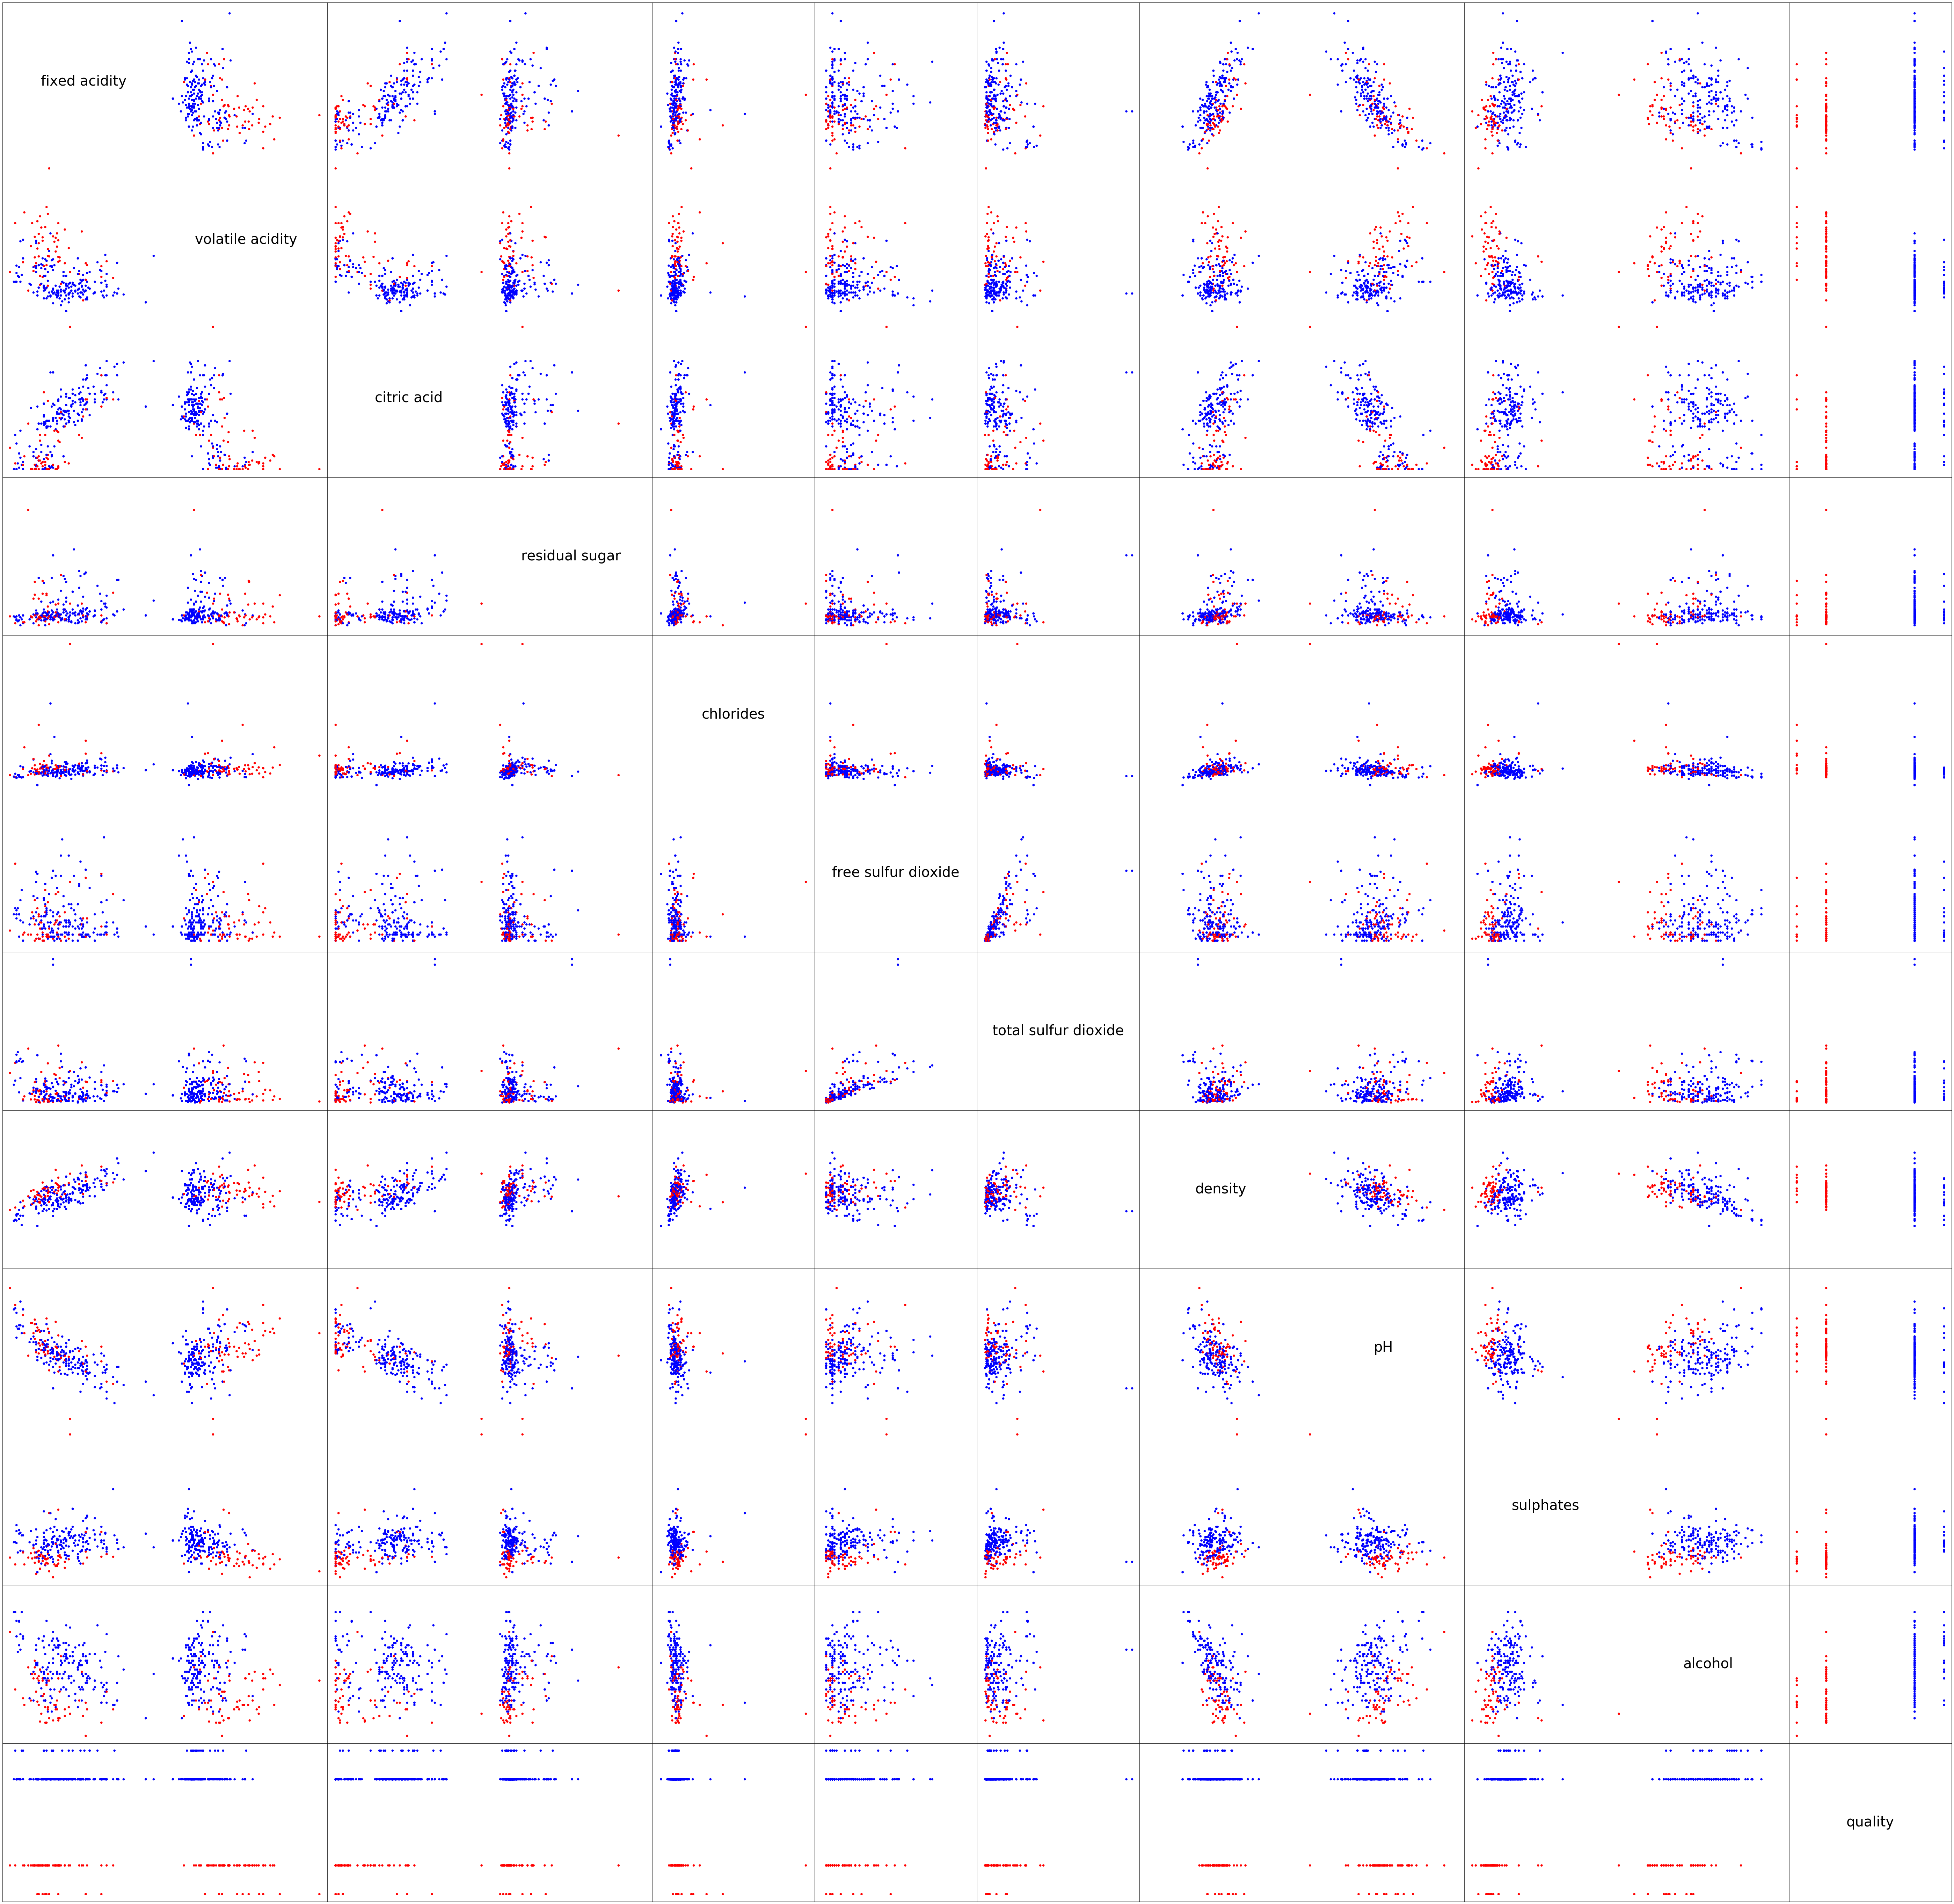

In [3]:
plot_scatter_matrix(red_wines, 6, 5)

__b) Which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?__

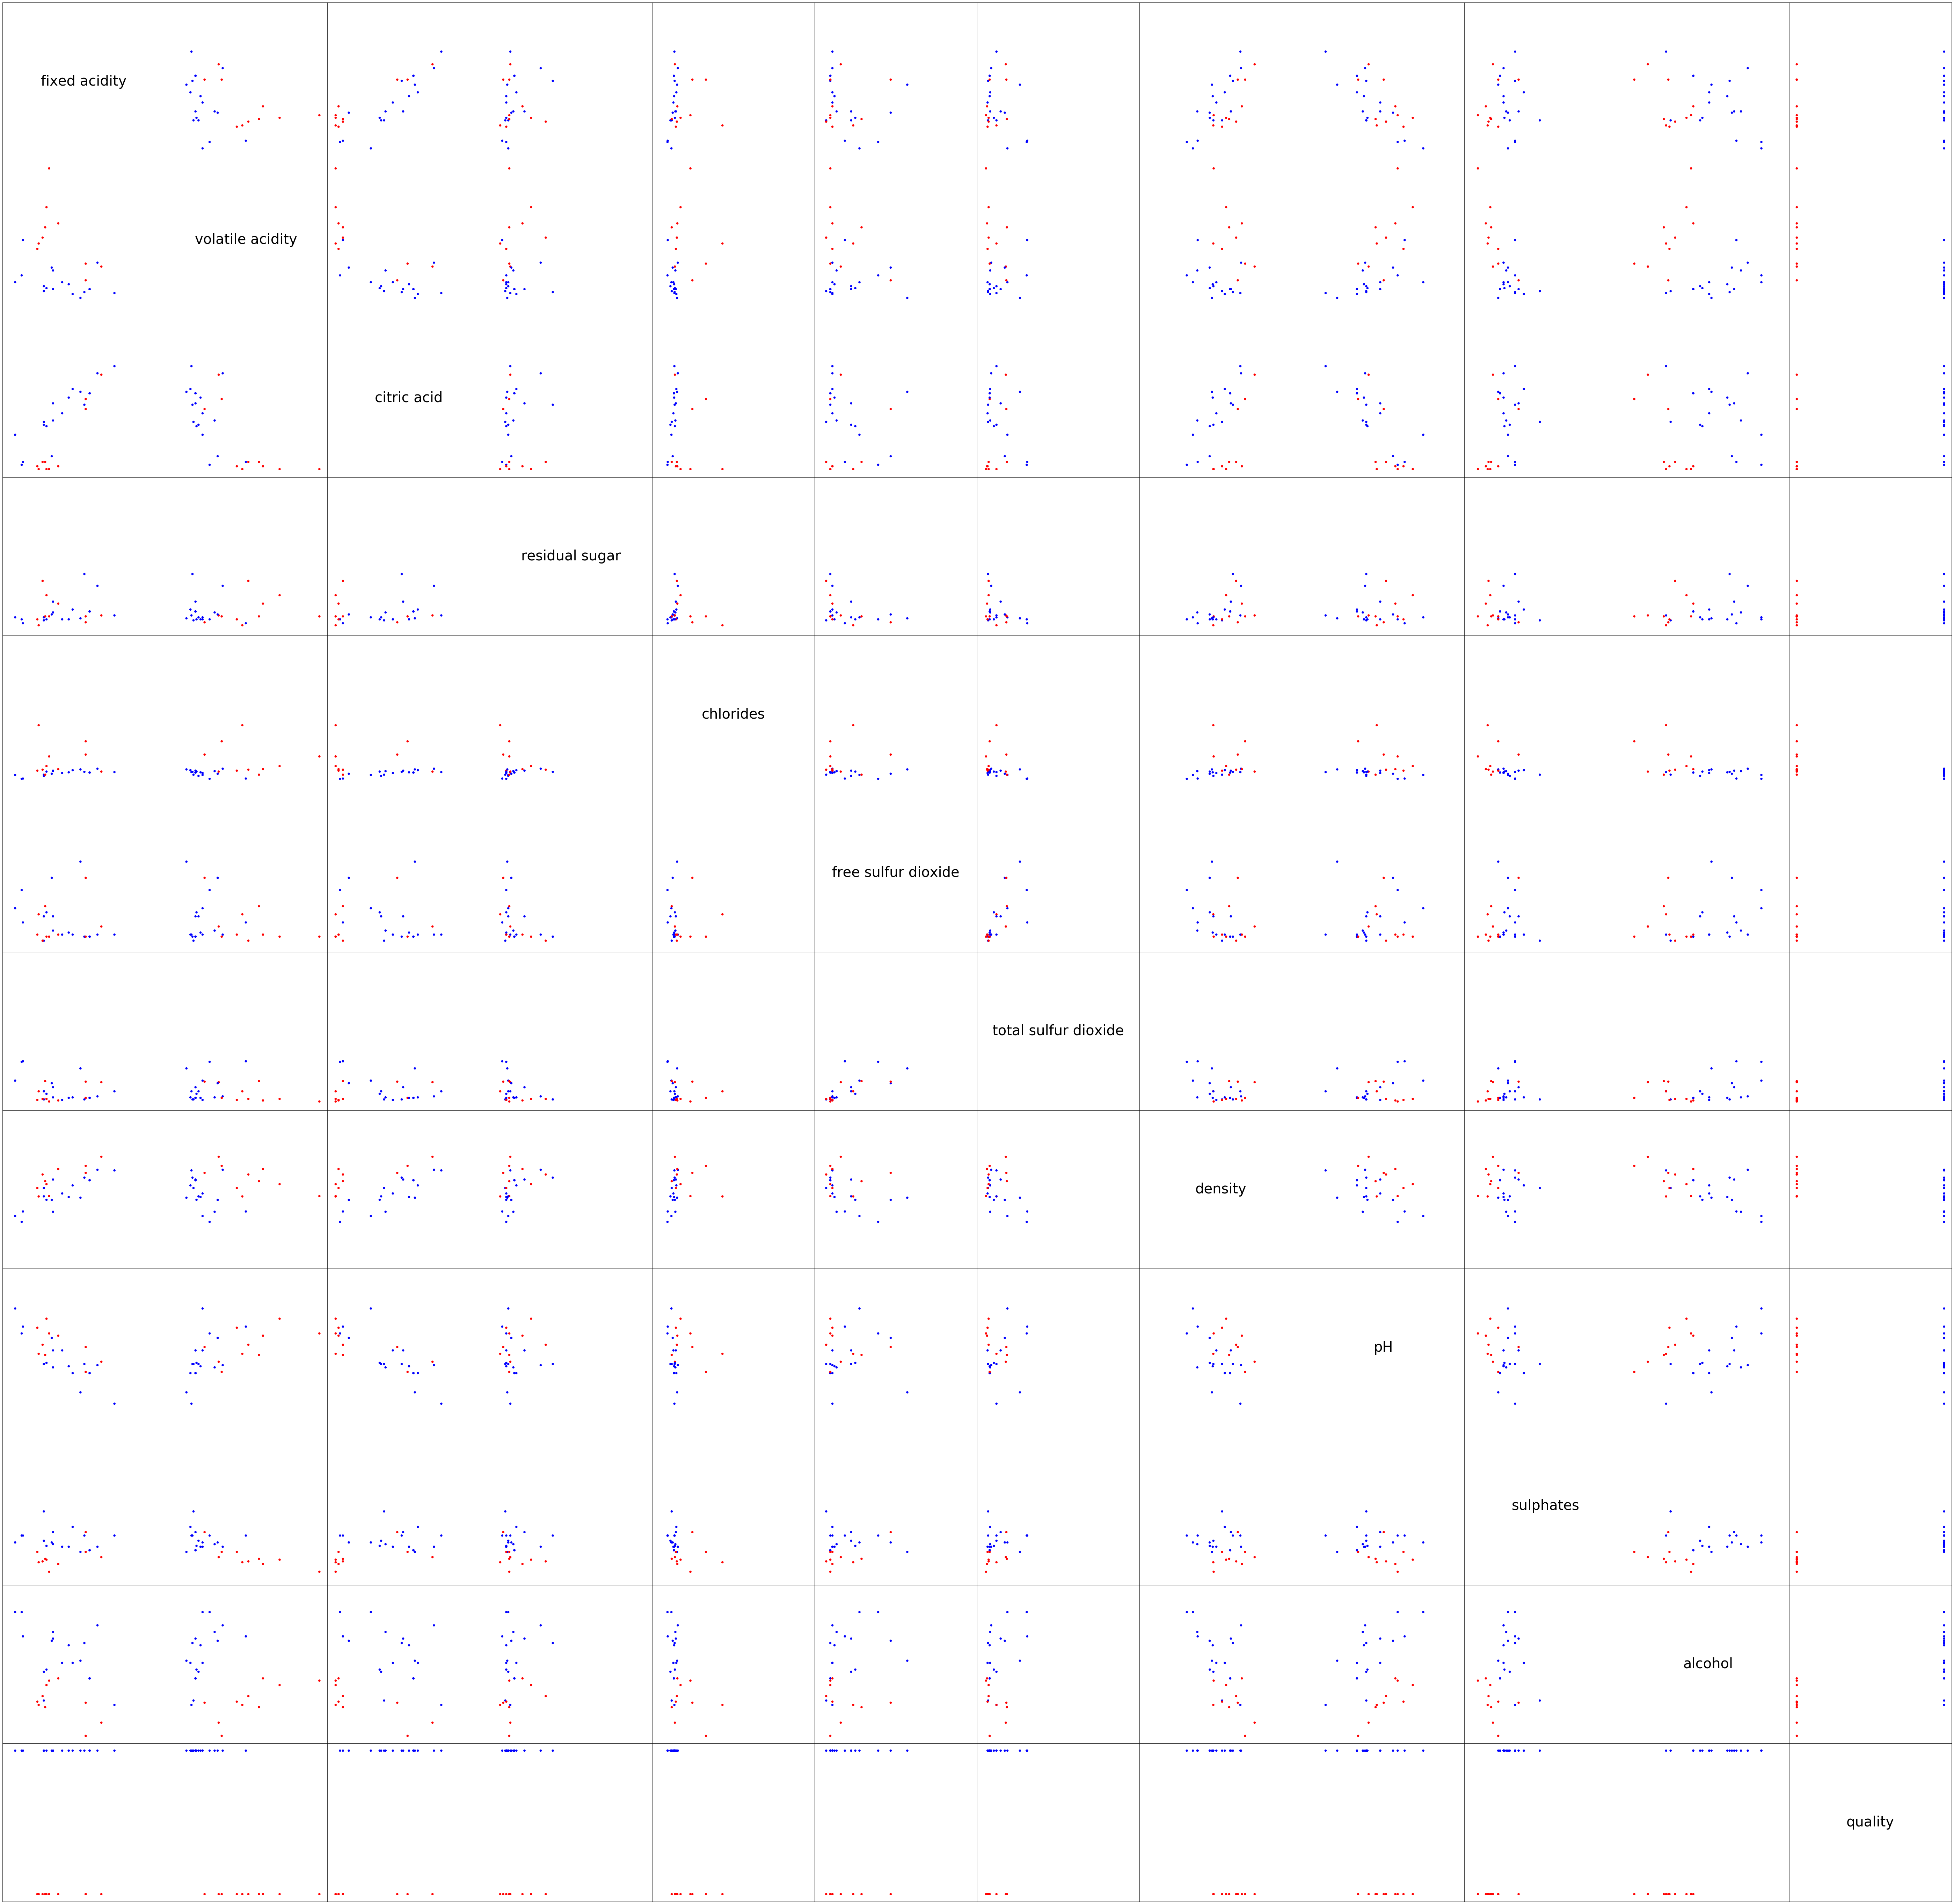

In [4]:
plot_scatter_matrix(red_wines, 7, 4)

Alcohol and pH will be good factors to begin with as we can clearly see a linear separation between both.

# V.2: Learning to perceptron

__a) & b) Perceptron implementation__

In [5]:
import random

red_wines['is good'] = red_wines['quality'] > 5

selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values


selected_red_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.35         0.46             3.6      0.078   
1           10.3              0.32         0.45             6.4      0.073   
2            5.6              0.85         0.05             1.4      0.045   
3           12.6              0.31         0.72             2.2      0.072   
4           11.3              0.62         0.67             5.2      0.086   
5           11.6              0.58         0.66             2.2      0.074   
6            9.4              0.30         0.56             2.8      0.080   
7           10.7              0.35         0.53             2.6      0.070   
8           10.7              0.35         0.53             2.6      0.070   
9           10.4              0.61         0.49             2.1      0.200   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  37.0   0.9973  3.35       0.86   
1                  5.0                  13.0   0.9976  3.23       0.82   
2                 12.0                  88.0   0.9924  3.56       0.82   
3                  6.0                  29.0   0.9987  2.88       0.82   
4                  6.0                  19.0   0.9988  3.22       0.69   
5                 10.0                  47.0   1.0008  3.25       0.57   
6                  6.0                  17.0   0.9964  3.15       0.92   
7                  5.0                  16.0   0.9972  3.15       0.65   
8                  5.0                  16.0   0.9972  3.15       0.65   
9                  5.0                  16.0   0.9994  3.16       0.63   

   alcohol  quality  is good  
0     12.8        8     True  
1     12.6        8     True  
2     12.9        8     True  
3      9.8        8     True  
4     13.4        8     True  
5      9.0        3    False  
6     11.7        8     True  
7     11.0        8     True  
8     11.0        8     True  
9      8.4        3    False

In [6]:
def dot_product(a, b):
    
    if len(a) != len(b):
        raise ValueError('arguments have different length')
        
    result = 0
    
    for i in range(len(a)):
        result += a[i] * b[i]
        
    return result

In [7]:
class Perceptron:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
    
    def train(self, X, Y, number_of_epochs=0):
        
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        
        self.performance = []
        
        current_epoch = 0
        while True:
            if number_of_epochs != 0 and current_epoch >= number_of_epochs:
                break
            misclassified = 0
            for xi, yi in zip(X, Y):
                delta_rule = self.lr * (yi - self.predict(xi))
                self.W[1:] += delta_rule * xi
                self.W[0] += delta_rule
                misclassified += int(delta_rule != 0)
            self.performance.append(
                [current_epoch,
                 misclassified,
                 self.W[1:],
                 self.W[0]])
            if misclassified == 0:
                break
            current_epoch += 1
        
        return self.performance
    
    def predict(self, X):
        return 1 if dot_product(self.W[1:], X) + self.W[0] >= 0 else 0

In [8]:
perceptron = Perceptron()

training_performance = perceptron.train(X, Y)
#print(training_performance)

__c) Plotting the performance during training__

In [9]:
def plot_performance(performance,
                     wine_data,
                     good_threshold,
                     bad_threshold,
                     epoch=-1,
                     save_plot=False):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot([x[0] for x in performance], [x[1] for x in performance])
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    
    selected_red_wines = wine_data[(wine_data['quality'] > good_threshold)
                                   | (wine_data['quality'] < bad_threshold)]
    x = selected_red_wines.loc[:, ['alcohol']].values
    y = selected_red_wines.loc[:, ['pH']].values
    
    x_min = x.min() - 0.15
    x_max = x.max() + 0.15
    y_min = y.min() - 0.15
    y_max = y.max() + 0.15
    
    w2, w1 = performance[epoch][2]
    b = performance[epoch][3]
    slope = -(w1/w2)#/(b/w1)
    intercept = -b/w2
    x_coords = range(int(x_min) - 1, int(x_max) + 2)
    y_coords = slope * x_coords + intercept
    
    axes[1].plot(x_coords, y_coords,'b--', label='Decision boundary')
    axes[1].set_xlim([x_min, x_max])
    axes[1].set_ylim([y_min, y_max])
    axes[1].fill_between(x_coords, y_coords, y_min, color='b', alpha=0.2)
    axes[1].fill_between(x_coords, y_coords, y_max, color='r', alpha=0.2)
    
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    
    axes[1].scatter(bad_wines['alcohol'],
                    bad_wines['pH'],
                    c=['r'],
                    label='bad wines (< {} score)'.format(bad_threshold))
    
    axes[1].scatter(good_wines['alcohol'],
                    good_wines['pH'],
                    c=['b'],
                    label='good wines (> {} score)'.format(good_threshold))
    
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    axes[1].set_title('Decision boundary on epoch: {}'.format(performance[epoch][0]))
    axes[1].set_xlabel('alcohol')
    axes[1].set_ylabel('pH')
        
    plt.show()
    
    if save_plot == True:
        plt.savefig('scatter_matrix.png')   
    

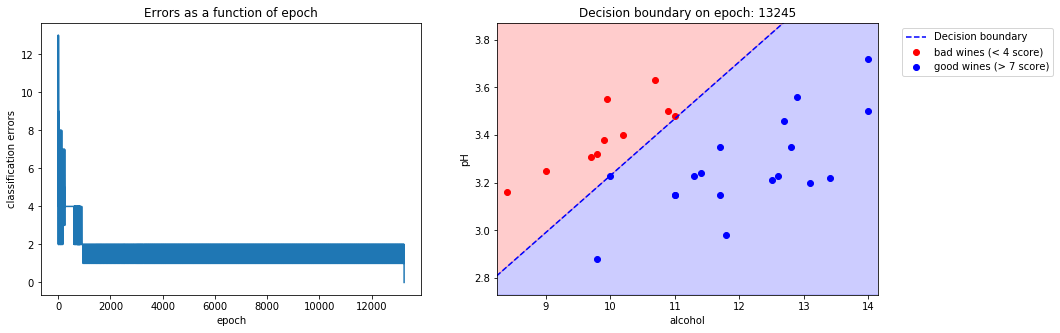

In [10]:
plot_performance(training_performance, red_wines, 7, 4)

__d) Feature scaling to speed up training__

In [11]:
def scale_series(series):
    return (series - series.mean()) / (series.max() - series.min())        

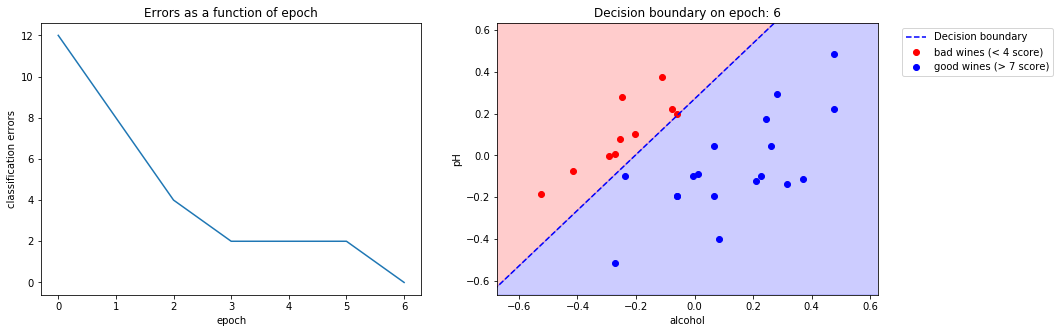

In [12]:
selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

perceptron = Perceptron(learning_rate=0.0001)

training_performance = perceptron.train(X, Y)

plot_performance(training_performance, selected_red_wines, 7, 4)

# V.3: My fair ADALINE

__a) Marvin notices and chides you for torturing your perceptron. Why?__

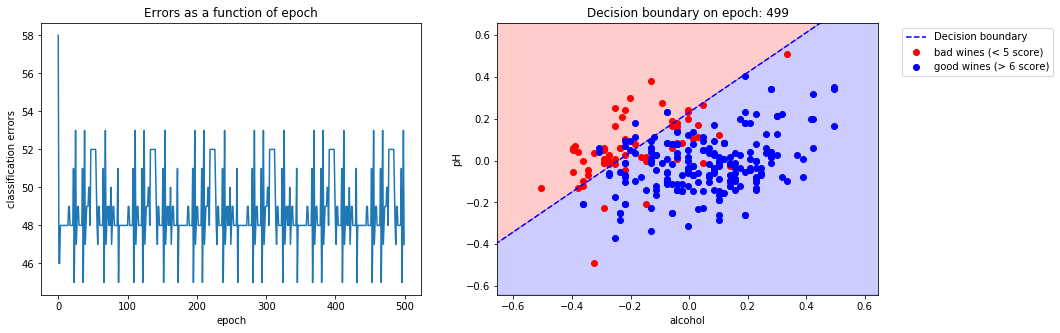

In [13]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

perceptron = Perceptron(learning_rate=0.0001)

training_performance = perceptron.train(X, Y, number_of_epochs=500)

plot_performance(training_performance, selected_red_wines, 6, 5)

The perceptron cannot converge on non-linearly differentiable data. It will always make some errors and thus never stop training.

__b) & c) Implementing ADALINE__

In [14]:
import math

class Adaline:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        
    def activation(self, X):
        var = dot_product(self.W[1:], X) + self.W[0]
        return 1 / (1 + math.exp(-var))
    
    def predict(self, X):
        return 1 if self.activation(X) >= 0 else 0
        
    def train(self, X, Y, number_of_epochs=0, mode="batch"):
        
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        
        self.performance = []
        
        current_epoch = 0
        while True:
            if number_of_epochs and current_epoch >= number_of_epochs:
                break
                
            misclassified = 0
            epoch_losses = []
            
            for xi, yi in zip(X, Y):
                oi = self.activation(xi)
                loss = yi - oi
                epoch_losses.append(loss)
                                
                if mode == "online":
                    self.W[1:] += self.lr * loss * xi
                    self.W[0] += self.lr * loss
                    
                misclassified += 1 if yi - round(oi) else 0
                
            if mode == "batch":
                self.W[1:] += self.lr * dot_product(X, epoch_losses)
                self.W[0] += self.lr * sum(epoch_losses)
                
            self.performance.append(
                [current_epoch,
                 misclassified,
                 self.W[1:],
                 self.W[0]])
            
            if number_of_epochs == 0 and misclassified == 0:
                break
                
            current_epoch += 1
        
        return self.performance

__d) Find a good learning rate__

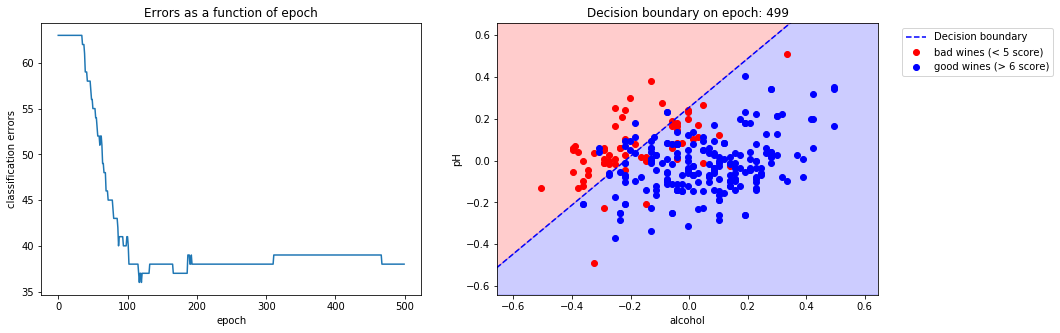

In [15]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

adaline = Adaline(learning_rate=0.01)

training_performance = adaline.train(X, Y, number_of_epochs=500)
#print(training_performance)

plot_performance(training_performance, selected_red_wines, 6, 5)

# V.4: Advanced wine sampling and resampling

__a) Write a function that uses the holdout method to partition the data into a training and a validation set__

In [16]:
def holdout_validation(data, validation_size=0.2):
    training_df = data.sample(frac=validation_size)
    validation_df = data.drop(training_df.index)
    return (training_df, validation_df)

__b) Write a function that generates a k-fold cross-validation dataset from the data__

In [17]:
def cross_validation(data, k=3, shuffle=False):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    folds = []
    for x in range(k, 0, -1):
        fold_size = len(data) // x
        if len(data) % x:
            new_fold = data.sample(n=fold_size+1)
        else:
            new_fold = data.sample(n=fold_size)
        folds.append(new_fold)
        data = data.drop(new_fold.index)
    dataset = []
    for x in range(len(folds)):
        dataset.append((folds[x], pd.concat(folds).drop(folds[x].index)))
    return dataset

__c) What effects does changing learning rate and number of training epochs have on the ADALINE when evaluated via k-fold cross-validation?__

In [18]:
class Adaline:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(2 + 1)]
        self.performance = []
        self.current_epoch = 0
        
    def activation(self, X):
        var = dot_product(self.W[1:], X) + self.W[0]
        return 1 / (1 + math.exp(-var))
    
    def predict(self, X):
        return 1 if self.activation(X) >= 0 else 0
    
    def validate(self, Xv, Yv):
        misclassified = 0
        for xi, yi in zip(Xv, Yv):
            oi = self.activation(xi)
            loss = yi - oi            
            misclassified += 1 if yi - round(oi) else 0
        return misclassified
        
    def train_epoch(self, X, Y, Xv, Yv, mode="batch"):
        misclassified = 0
        epoch_losses = []

        for xi, yi in zip(X, Y):
            oi = self.activation(xi)
            loss = yi - oi
            epoch_losses.append(loss)

            if mode == "online":
                self.W[1:] += self.lr * loss * xi
                self.W[0] += self.lr * loss

            misclassified += 1 if yi - round(oi) else 0

        if mode == "batch":
            self.W[1:] += self.lr * dot_product(X, epoch_losses)
            self.W[0] += self.lr * sum(epoch_losses)
           
        return misclassified
            
        
    def train_cross_validation(self, data, epochs=0):
        while True:
            misclassified = 0
            
            if epochs and self.current_epoch >= epochs:
                break
                
            for x in range(len(data)):
                Xt = data[x][0].loc[:, ['pH', 'alcohol']].values
                Yt = data[x][0]['is good'].values
                Xv = data[x][1].loc[:, ['pH', 'alcohol']].values
                Yv = data[x][1]['is good'].values
                misclassified += self.train_epoch(Xt, Yt, Xv, Yv)
                
            self.performance.append(
            [self.current_epoch,
             misclassified,
             self.W[1:],
             self.W[0]])
                
            if epochs == 0 and misclassified == 0:
                break
                
            self.current_epoch += 1
        
        return self.performance

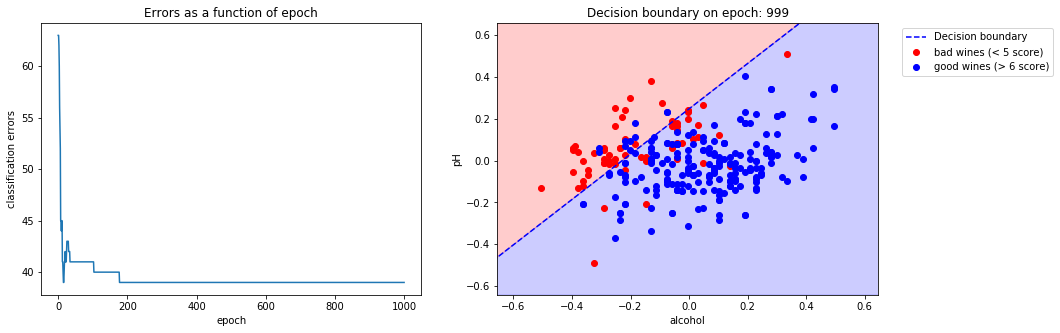

In [19]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

data = cross_validation(selected_red_wines, k=5, shuffle=True)

adaline = Adaline(learning_rate=0.1)

training_performance = adaline.train_cross_validation(data, epochs=1000)
#print(training_performance)

plot_performance(training_performance, selected_red_wines, 6, 5)

When using k-fold cross-validation, we can use a higher learning rate allowing the model to converge faster so that less training epochs are required. But the principal benefit is that the model is more balanced as cross-validation discourages overfitting. We don't see an increase in errors after a certain epoch as we did before.

# V.5: Adventures in the Nth dimension

__a) Try training your perceptron/ADALINE with different numbers and types of chemical factors. Under what circumstances can your perceptron/ADALINE successfully train?__

In [20]:
def plot_performance_3(performance,
                     wine_data,
                     good_threshold,
                     bad_threshold,
                     epoch=-1,
                     save_plot=False):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot([x[0] for x in performance], [x[1] for x in performance])
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    
    selected_red_wines = wine_data[(wine_data['quality'] > good_threshold)
                                   | (wine_data['quality'] < bad_threshold)]
    x = selected_red_wines.loc[:, ['alcohol']].values
    y = selected_red_wines.loc[:, ['pH']].values
    
    x_min = x.min() - 0.15
    x_max = x.max() + 0.15
    y_min = y.min() - 0.15
    y_max = y.max() + 0.15
    
    w3, w2, w1 = performance[epoch][2]
    b = performance[epoch][3]
    slope = -(w1/w2)#/(b/w1)
    intercept = -b/w2
    x_coords = range(int(x_min) - 1, int(x_max) + 2)
    y_coords = slope * x_coords + intercept
    
    axes[1].plot(x_coords, y_coords,'b--', label='Decision boundary')
    axes[1].set_xlim([x_min, x_max])
    axes[1].set_ylim([y_min, y_max])
    axes[1].fill_between(x_coords, y_coords, y_min, color='b', alpha=0.2)
    axes[1].fill_between(x_coords, y_coords, y_max, color='r', alpha=0.2)
    
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    
    axes[1].scatter(bad_wines['alcohol'],
                    bad_wines['pH'],
                    c=['r'],
                    label='bad wines (< {} score)'.format(bad_threshold))
    
    axes[1].scatter(good_wines['alcohol'],
                    good_wines['pH'],
                    c=['b'],
                    label='good wines (> {} score)'.format(good_threshold))
    
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    axes[1].set_title('Decision boundary on epoch: {}'.format(performance[epoch][0]))
    axes[1].set_xlabel('alcohol')
    axes[1].set_ylabel('pH')
        
    plt.show()
    
    if save_plot == True:
        plt.savefig('scatter_matrix.png')  

In [21]:
class Adaline:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(3 + 1)]
        self.performance = []
        self.current_epoch = 0
        
    def activation(self, X):
        var = dot_product(self.W[1:], X) + self.W[0]
        return 1 / (1 + math.exp(-var))
    
    def predict(self, X):
        return 1 if self.activation(X) >= 0 else 0
    
    def validate(self, Xv, Yv):
        misclassified = 0
        for xi, yi in zip(Xv, Yv):
            oi = self.activation(xi)
            loss = yi - oi            
            misclassified += 1 if yi - round(oi) else 0
        return misclassified
        
    def train_epoch(self, X, Y, Xv, Yv, mode="batch"):
        misclassified = 0
        epoch_losses = []

        for xi, yi in zip(X, Y):
            oi = self.activation(xi)
            loss = yi - oi
            epoch_losses.append(loss)

            if mode == "online":
                self.W[1:] += self.lr * loss * xi
                self.W[0] += self.lr * loss

            misclassified += 1 if yi - round(oi) else 0

        if mode == "batch":
            self.W[1:] += self.lr * dot_product(X, epoch_losses)
            self.W[0] += self.lr * sum(epoch_losses)
           
        return misclassified
            
        
    def train_cross_validation(self, data, epochs=0):
        while True:
            misclassified = 0
            
            if epochs and self.current_epoch >= epochs:
                break
                
            for x in range(len(data)):
                Xt = data[x][0].loc[:, ['pH', 'alcohol', 'volatile acidity']].values
                Yt = data[x][0]['is good'].values
                Xv = data[x][1].loc[:, ['pH', 'alcohol', 'volatile acidity']].values
                Yv = data[x][1]['is good'].values
                misclassified += self.train_epoch(Xt, Yt, Xv, Yv)
                
            self.performance.append(
            [self.current_epoch,
             misclassified,
             self.W[1:],
             self.W[0]])
                
            if epochs == 0 and misclassified == 0:
                break
                
            self.current_epoch += 1
        
        return self.performance

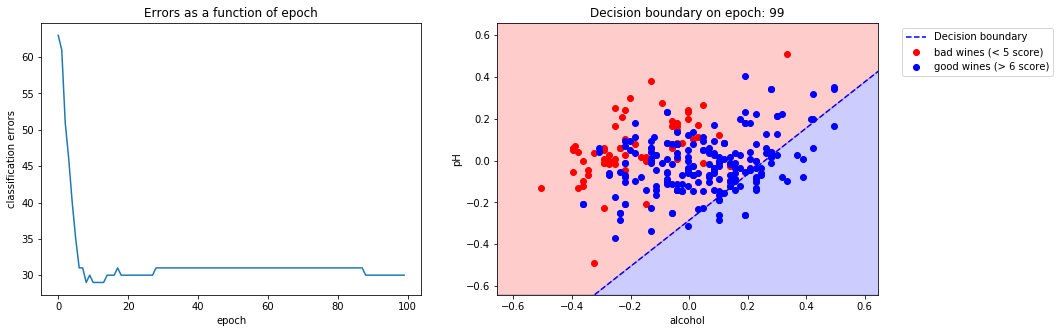

In [22]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['volatile acidity'] = scale_series(selected_red_wines['volatile acidity'])
selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

data = cross_validation(selected_red_wines, k=5, shuffle=True)

adaline = Adaline(learning_rate=0.1)

training_performance = adaline.train_cross_validation(data, epochs=100)
#print(training_performance)

plot_performance_3(training_performance, selected_red_wines, 6, 5)

The perceptron is able to train successfully only if the data is linearly differentiable, so it will not converge if the boundary is not clear, and each time we add a feature, we add a dimension, making it less likely to be able to converge. It is hard to find a 2D decision boundary in a 3D space. The perceptron depends on the differentiablity of the data, each dimension makes it harder to get such a separation.

ADALINE can train because it can converge even if errors persist. Thus it is able to get better even if we had features. We had complexity to find a clear separation between each feature but we can still theoritically converge if the data is meaningful.

__b) You know what the decision boundary for 2 wine chemical factors looks like, but what
does the decision boundary for 3 factors look like? What about if you use 7 factors?
How about if you use all 11 wine chemical factors?__

Everytime we had a feature to our training, we are adding a dimension in our data. With only 2 features, we are working in a 2D space, the decision boundary is then a simple line. If we use 3 features we move to a 3D space, so we need a 2 dimensional boundary, in the case of our linear model it will be an hyperplane. Basically machine learning helps reducing the dimensionality of the data, the boundary is always one dimension less than the data. Above 4 features, we cannot represent the boundary as a common form, we can only represent up to 3 dimensions visually. But there are techniques to build meaningful representations of high dimensional data. It requires to transform the higher dimensions into lower dimensional modifications. Kind of like a planisphere to represent Earth.

Link: https://www.youtube.com/watch?v=wvsE8jm1GzE

# V.6: Marvin's rebuttal

In [23]:
def scale_series_1(series):
    return (series - series.min()) / (series.max() - series.min()) 

def scale_series_2(series):
    return (series - series.mean()) / (series.max() - series.min()) 

In [24]:
gargle_blaster = pd.read_csv('./pan_galactic_gargle_blaster.csv', sep=';')
#gargle_blaster['wonderflonium'] = scale_series_1(gargle_blaster['wonderflonium'])
#gargle_blaster['fallian marsh gas'] = scale_series_1(gargle_blaster['fallian marsh gas'])
gargle_blaster.head(10)

wonderflonium  fallian marsh gas  quality
0       4.151636           5.350607        2
1       3.403125           4.787343        2
2       5.036224           4.609847        2
3       4.483534           4.332340        9
4       4.215979           5.220295        2
5       4.358374           4.484558        9
6       3.672214           3.440111        1
7       4.940593           3.772474        1
8       4.572444           4.242681        8
9       5.084678           4.044793        2

In [25]:
gargle_blaster['diff'] = gargle_blaster['wonderflonium'] - gargle_blaster['fallian marsh gas']
gargle_blaster['diff'] = gargle_blaster['diff'].abs()
gargle_blaster['sum'] = gargle_blaster['wonderflonium'] + gargle_blaster['fallian marsh gas']
gargle_blaster['sum'] = scale_series_2(gargle_blaster['sum']).abs() + (gargle_blaster['diff'] * 1)
gargle_blaster.head(10)

wonderflonium  fallian marsh gas  quality      diff       sum
0       4.151636           5.350607        2  1.198971  1.489169
1       3.403125           4.787343        2  1.384218  1.468808
2       5.036224           4.609847        2  0.426376  0.757667
3       4.483534           4.332340        9  0.151194  0.245288
4       4.215979           5.220295        2  1.004316  1.275665
5       4.358374           4.484558        9  0.126184  0.228009
6       3.672214           3.440111        1  0.232103  0.624730
7       4.940593           3.772474        1  1.168119  1.232841
8       4.572444           4.242681        8  0.329763  0.423644
9       5.084678           4.044793        2  1.039884  1.223577

In [26]:
def plot_scatter_matrix(data, good_threshold, bad_threshold, save_plot=False):
    fig, axes = plt.subplots(5, 5, figsize=(100,100))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
    for y in range(0, 5):
        for x in range(0, 5):
            if x == y:
                axes[y, x].text(0.5, 0.5, data.columns[y], fontsize=40, ha='center', va='center')
            else:
                colors = ['b' if k >= good_threshold else 'r' for k in data['quality']]
                size = [30 if k > good_threshold else 30 if k < bad_threshold else 0 for k in data['quality']]
                axes[y, x].scatter(data.iloc[:, x], data.iloc[:, y], s=size, c=colors)
            
    if save_plot == True:
        plt.savefig('scatter_matrix.png')

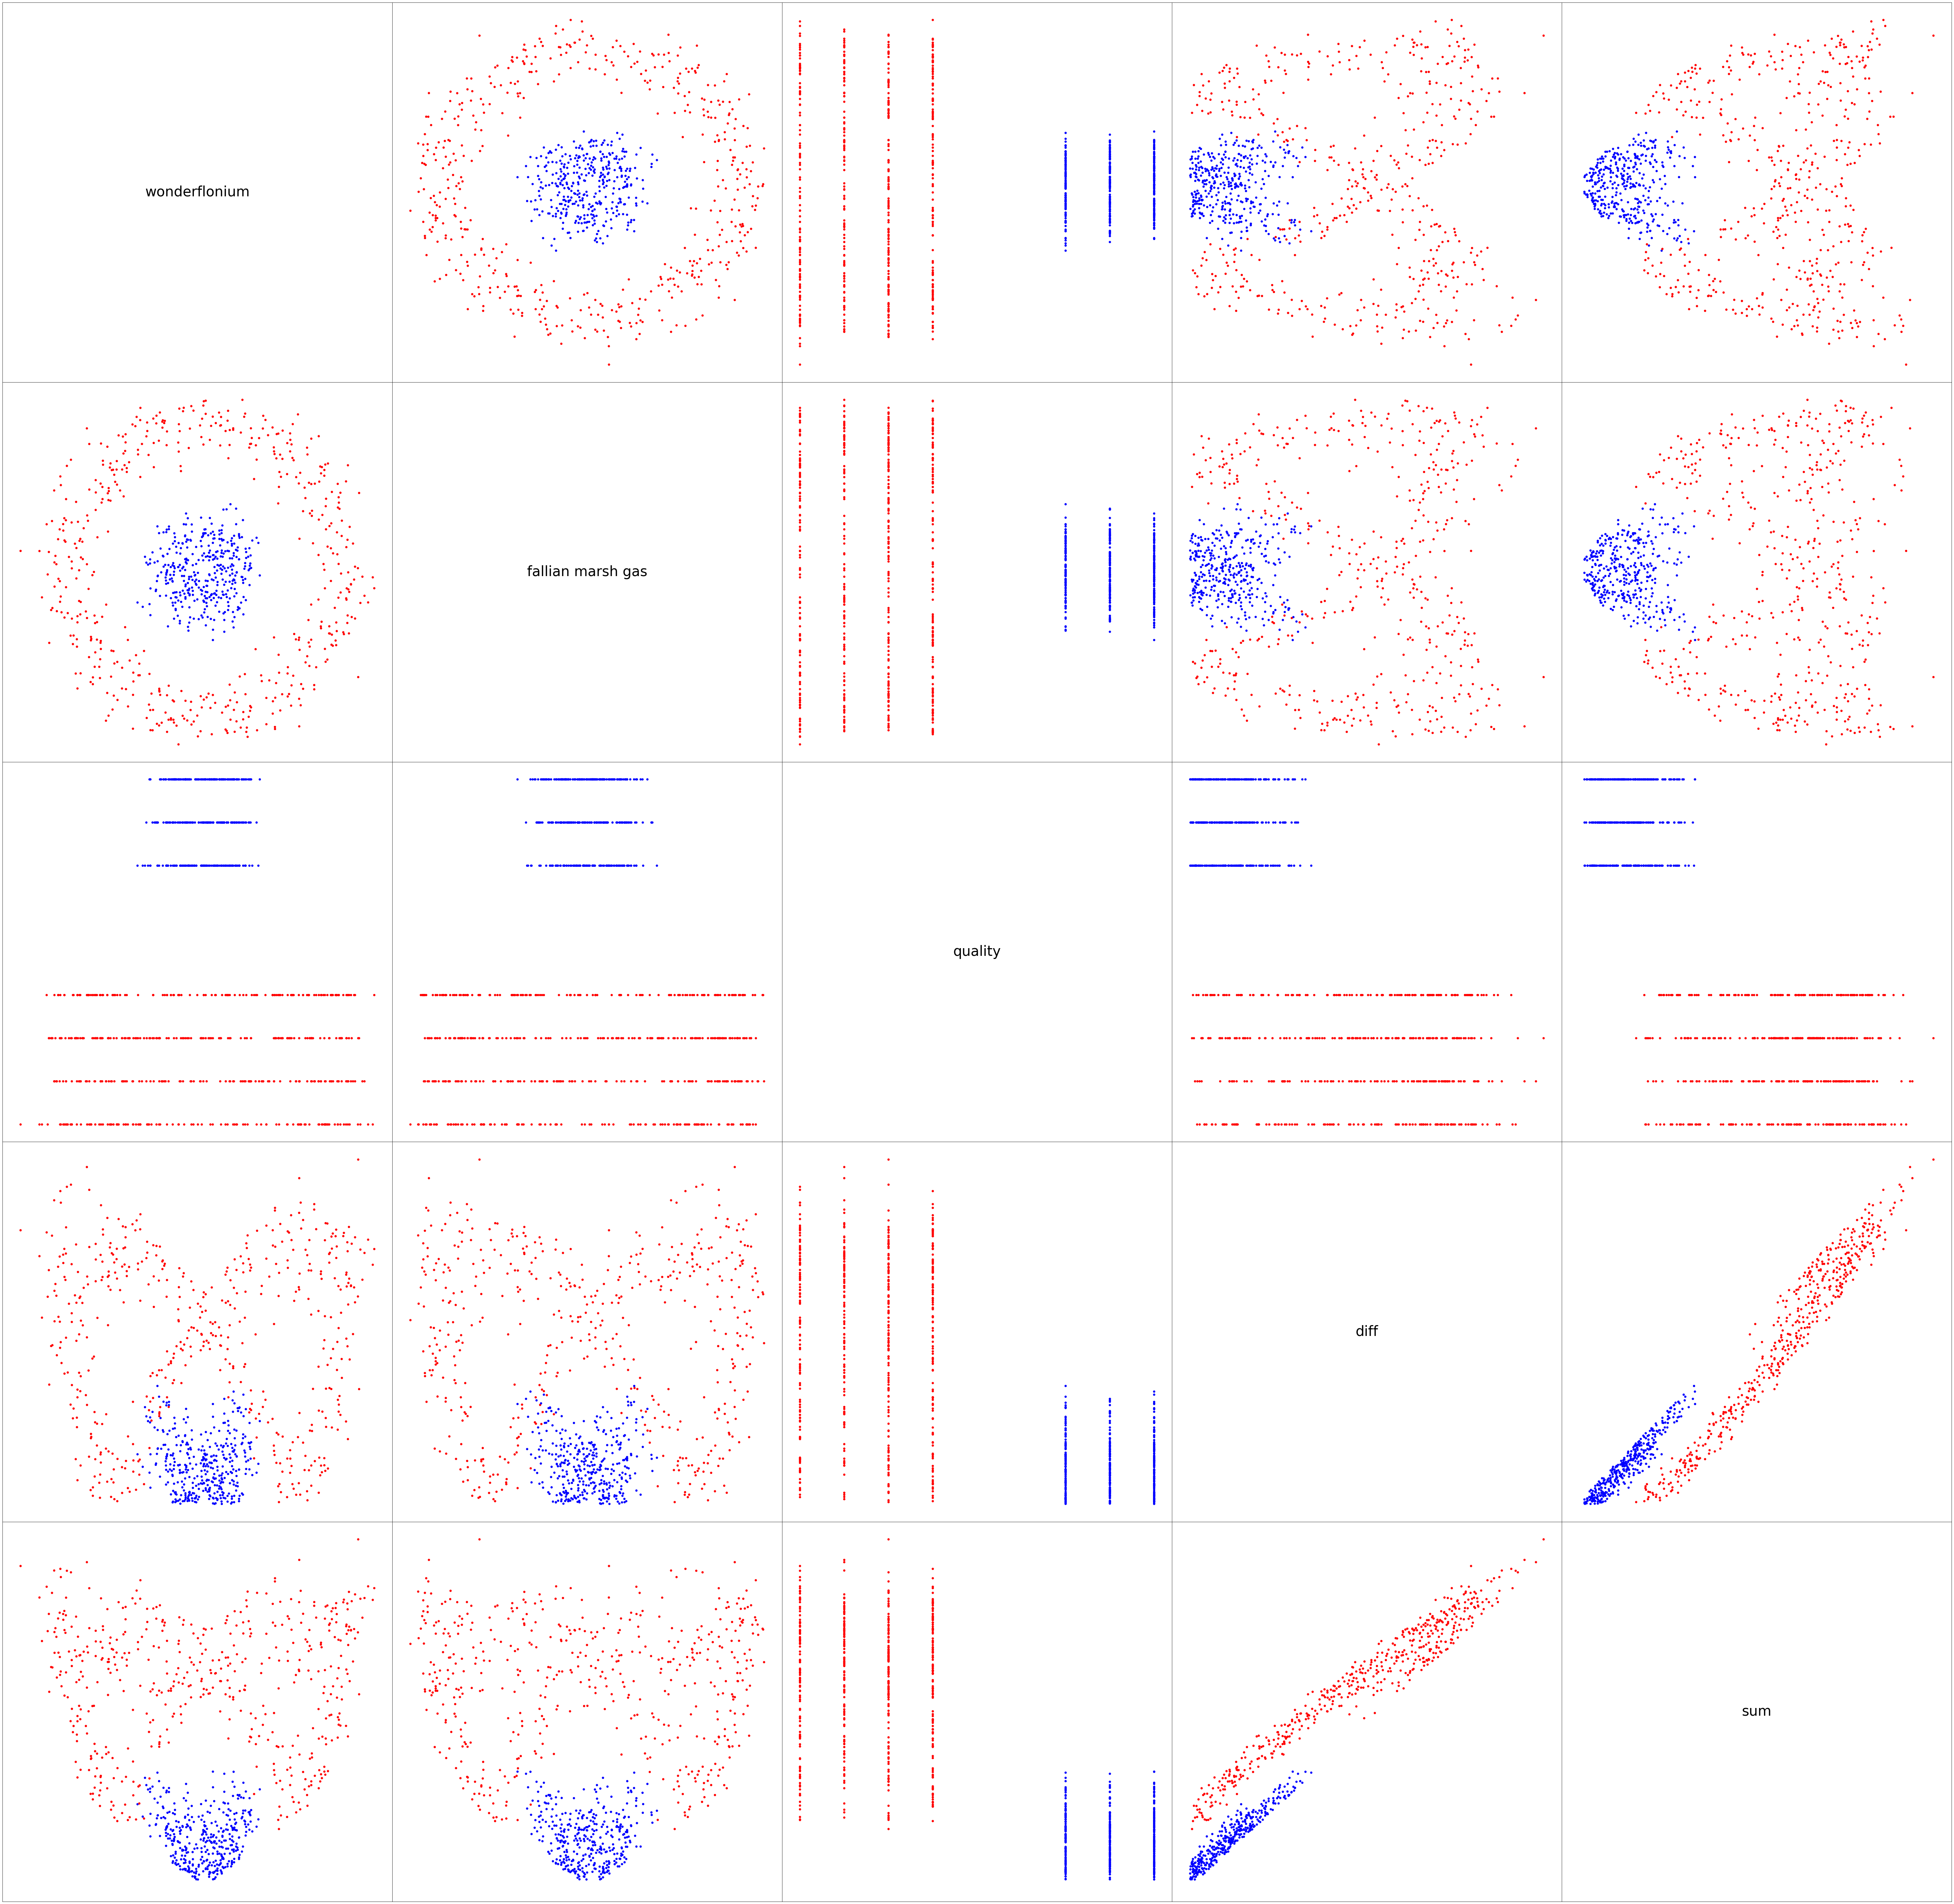

In [27]:
plot_scatter_matrix(gargle_blaster, 6, 5)

Visually we see that when the two factors have close values, the wine is bad, and when the values are different, the wine is good. So we have a linear relation between the absolute value of the difference between factors and the goodness of the wine. So we should be able to solve the problem with a single variable perceptron.

In [28]:
gargle_blaster['is good'] = gargle_blaster['quality'] > 5

X = gargle_blaster.loc[:, ['diff', 'sum']].values
Y = gargle_blaster['is good'].values

gargle_blaster.head(10)

wonderflonium  fallian marsh gas  quality      diff       sum  is good
0       4.151636           5.350607        2  1.198971  1.489169    False
1       3.403125           4.787343        2  1.384218  1.468808    False
2       5.036224           4.609847        2  0.426376  0.757667    False
3       4.483534           4.332340        9  0.151194  0.245288     True
4       4.215979           5.220295        2  1.004316  1.275665    False
5       4.358374           4.484558        9  0.126184  0.228009     True
6       3.672214           3.440111        1  0.232103  0.624730    False
7       4.940593           3.772474        1  1.168119  1.232841    False
8       4.572444           4.242681        8  0.329763  0.423644     True
9       5.084678           4.044793        2  1.039884  1.223577    False

In [29]:
def plot_performance_1(performance,
                     data,
                     good_threshold,
                     bad_threshold,
                     epoch=-1,
                     save_plot=False):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot([x[0] for x in performance], [x[1] for x in performance])
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    
    x = data.loc[:, ['diff']].values
    y = data.loc[:, ['sum']].values
    
    x_min = x.min() - 0.15
    x_max = x.max() + 0.15
    y_min = y.min() - 0.15
    y_max = y.max() + 0.15
    
    w1, w2 = performance[epoch][2]
    b = performance[epoch][3]
    slope = -(w1/w2)#/(b/w1)
    intercept = -b/w2
    x_coords = range(int(x_min) - 1, int(x_max) + 2)
    y_coords = slope * x_coords + intercept
    
    axes[1].plot(x_coords, y_coords,'b--', label='Decision boundary')
    axes[1].set_xlim([x_min, x_max])
    axes[1].set_ylim([y_min, y_max])
    axes[1].fill_between(x_coords, y_coords, y_min, color='b', alpha=0.2)
    axes[1].fill_between(x_coords, y_coords, y_max, color='r', alpha=0.2)
    
    good_wines = data[(data['quality'] > good_threshold)]
    bad_wines = data[(data['quality'] < bad_threshold)]
    
    axes[1].scatter(bad_wines['diff'],
                    bad_wines['sum'],
                    c=['r'],
                    label='bad blaster (< {} score)'.format(bad_threshold))
    
    axes[1].scatter(good_wines['diff'],
                    good_wines['sum'],
                    c=['b'],
                    label='good blaster (> {} score)'.format(good_threshold))
    
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    axes[1].set_title('Decision boundary on epoch: {}'.format(performance[epoch][0]))
    axes[1].set_xlabel('diff')
    axes[1].set_ylabel('sum')
        
    plt.show()
    
    if save_plot == True:
        plt.savefig('scatter_matrix.png')  

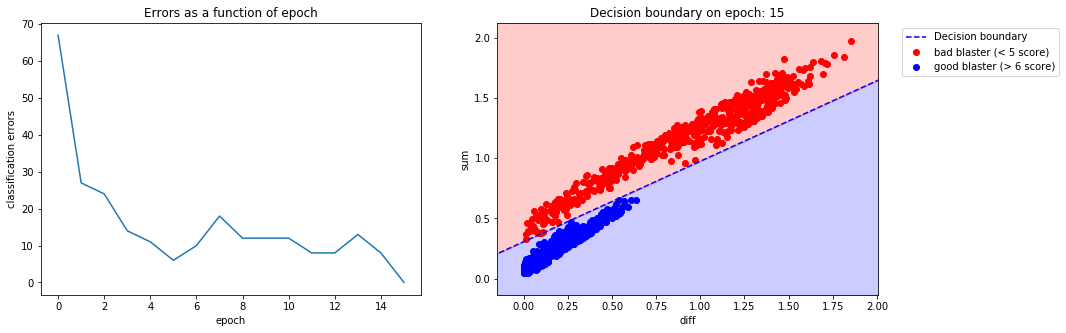

In [30]:
perceptron = Perceptron(learning_rate=0.01)

performance = perceptron.train(X, Y, number_of_epochs=100)
#print(performance)
plot_performance_1(performance, gargle_blaster, 6, 5)